In [2]:
import numpy as np
import matplotlib.pyplot as plt

(a) Implement a simulation experiment of the minimization of f(x) = $x^2$
. Suppose
the particle starts with initial velocity, v = 10, pointing away from the optimum,
and with initial position x = 20. As in the previous exercsie, for the sake of
simplicity, we keep r1 and r2 constant during the optimization process. Consider
the following two settings: (1) ω = 0.5, α1 = α2 = 1.5, r1 = r2 = 0.5; (2)
ω = 0.7, α1 = α2 = 1.5, r1 = r2 = 1.


In [3]:
def calc_fitness(candidate):
    return np.square(candidate)

In [4]:
def update_velocity(vel, local_best, global_best, current, omega, alpha1, alpha2, r1, r2):
    return omega*vel + alpha1*r1*(local_best - current) + alpha2*r2*(global_best - current)

def update_position(current, velocity):
    new_pos = current + velocity
    return new_pos


In [13]:
def run_PSO(p, v, omega, alpha1, alpha2, r1, r2):
    gen = 0
    local_best = global_best =  p
    # Keep track for statistics
    positions = [p]
    while not calc_fitness(p) == 0 and gen <= 100:
        if gen % 50 == 0:
            print(f"current generation: {gen} -- current fitness: {calc_fitness(p)} -- current position: {p}")
        v = update_velocity(v, local_best, global_best, p, omega, alpha1, alpha2, r1, r2)
        p = update_position(p, v)
        local_best = p if calc_fitness(p) < calc_fitness(local_best) else local_best
        global_best = local_best
        positions.append(p)
        gen += 1
    return positions

current generation: 0 -- current fitness: 400 -- current position: 20
current generation: 50 -- current fitness: 225.00000000000054 -- current position: 15.000000000000018
current generation: 100 -- current fitness: 225.0 -- current position: 15.0


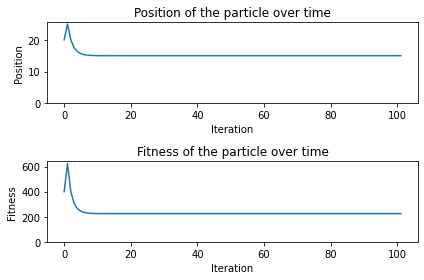

In [20]:
# Define initial values
p = 20
v = 10
# Define Hyperparameters
omega = 0.5
r1 = r2 = 0.5
alpha1 = alpha2 = 1.5

positions = run_PSO(p, v , omega, alpha1, alpha2, r1, r2)
fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(positions)), positions)
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Position")
axs[0].title.set_text("Position of the particle over time")
axs[1].plot(np.arange(len(positions)), [calc_fitness(p) for p in positions])
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Fitness")
axs[1].title.set_text("Fitness of the particle over time")
axs[0].axis(ymin=0)
axs[1].axis(ymin=0)

fig.tight_layout()


current generation: 0 -- current fitness: 400 -- current position: 20
current generation: 50 -- current fitness: 1.9418319956074818e-05 -- current position: -0.004406622284252965
current generation: 100 -- current fitness: 9.536151238251582e-11 -- current position: 9.765321929281995e-06


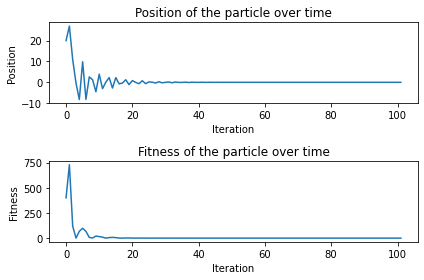

In [19]:
# Define initial values
p = 20
v = 10
# Define Hyperparameters
omega = 0.7
r1 = r2 = 1
alpha1 = alpha2 = 1.5

positions = run_PSO(p, v , omega, alpha1, alpha2, r1, r2)
fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(positions)), positions)
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Position")
axs[0].title.set_text("Position of the particle over time")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Fitness")
axs[1].plot(np.arange(len(positions)), [calc_fitness(p) for p in positions])
axs[1].title.set_text("Fitness of the particle over time")

fig.tight_layout()


(c) Discuss how would a particle ”swarm” consisting of a single member perform
in such a minimization task when ω < 1, assuming the particle starts with the
velocity pointing away from the optimum.

Whether the value of $\omega$ is smaller or larger than 1 affects how a particle explores the search space over time. By using a value for $\omega$ that is smaller than 1, the value of a particle's velocity will gradually decrease over time, until eventually reaching 0. Once the velocity of a particle reaches 0, its position remains static and no further search of the neighborhood is performed. 

If a particle's current velocity is pointing away from the optimum, it will need time/energy to overcome the inertia of its movement. When omega is smaller, it is easier to overcome the inertia and change direction correctly. However, using omega $<1$, the absolute velocity of the particle will be decreasing over time, making it hard for the particle to reach the optimum before coming to a standstill. This behavior can be observed in this exercise when using the first set of settings, in which $\omega$ is set to 0.5. With this value, the particle was moving towards the global optimum, but its velocity was decreasing so quickly that when the velocity of the particle reached 0, it was still far from the function's optimum.